<a href="https://colab.research.google.com/github/hashaam13/Computer-vision/blob/main/ImageProc_Week4_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will discuss image representation in the frequency domain. Besides, we will see how frequency transformations change the original image.



Let's install the required library version and import the packets to be used in future.

In [ ]:
!pip install opencv-python==4.4.0.42

     |████████████████████████████████| 49.4MB 74kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

# **Fourier transform in Python and filtering in frequency domain**

Firts, let's learn to make the discrete Fourier transform in Python.

Read the black-and-white image and display it. If the original image is a color one, then you have to work with every its channel separately.

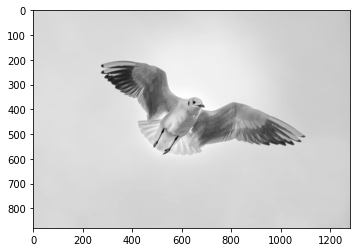

In [ ]:
img = cv2.imread('seagull.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

Let's perform the Fourier transform and visualize the result. Two-dimensional discrete Fourier transform (actually fast Fourier transform) in the `numpy` library can be performed using `np.fft.fft2()`function, taking the original image as argument.

In [ ]:
f = np.fft.fft2(img)
print(f[10, 12])

(-303609.54502521426-287581.0858228238j)


As a result we obtain a 2D matrix of the same size as the one of the original image, the elements of which are generally complex.

For the visualization convenience, we shift the component corresponding to the zero frequency (`f[0][0]`) to the center (this is widely used). This can be done automatically using `np.fft.fftshift()` function, the argument of which is the previously obtained Fourier transform `f`. It is easy to check that since the image has dimensions $1200 \times 1600$, then `fshift[600][800] = f[0][0]`.

In [ ]:
fshift = np.fft.fftshift(f)
print(fshift[600][800] == f[0][0])

True


To visualize Fourier transform, we replace all matrix elements by their absolute values, i.e. magnitudes. And... 

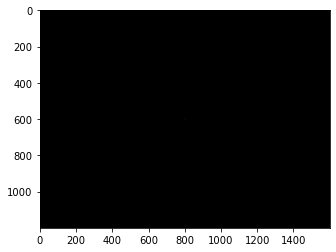

In [ ]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

We see nothing except some white blob in the center. The point is, that the difference in magnitudes is too high.

In [ ]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[600][800])

min: 10.815443187335951 max: 242373590.0
242373590.0


We would like to emphasise that the maximum magnitude corresponds to the zero frequency (in the center of the shifted Fouries transform). Let's apply logarithmic scaling (a common standard technique for the Fourier transform visualization). The transformations themselves may slightly differ, but this will not make significant differences when rendered. The unity under the logarithm is added to avoid obtaining very small values ​​of the logarithm when its argument is close to $0$ (although in our case it does not happen, as it follows from the obtained above `min` value).

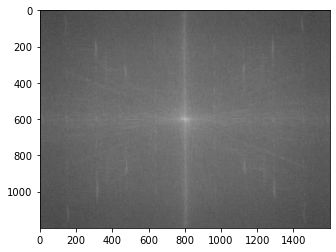

In [ ]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

So, what do we see in the resulting picture? The lighter the point, the greater its magnitude, that is, the more information it carries. The further we move from the center, the higher the frequency. Light regions correspond to lower frequencies, while dark regions correspond to higher frequencies. We see that in general, low frequencies carry more information than high frequencies.

What shows the frequency? High frequencies correspond to sharp changes in pixel intensity, and low frequencies, on the contrary, to smooth changes in pixel intensity.

Now let's try to remove the main low frequencies: we will set their magnitudes to zero, by assigning the value $0$ to all elements of `fshift` matrix which are close to the center.

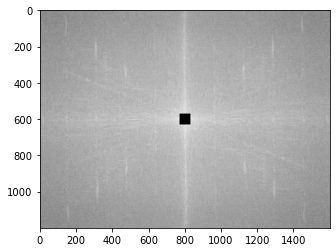

In [ ]:
fshift[600 -  30 : 600 + 30, 800-30 : 800 + 30] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

To get a sensible picture, apply the inverse fast Fourier transform using the `np.fft.ifft2()` function, which takes the Fourier transform as an argument. First, you need to "shift everything back" using  `np.fft.ifftshift()`.

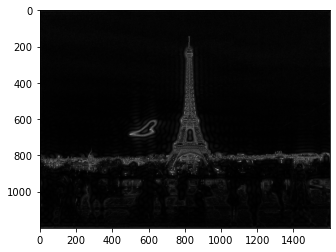

In [ ]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

We see now clearly visible borders in the image: all monochrome is gone. Thus, we easily segmented the Eiffel Tower, the flying bird and the border of the city blocks stretching beyond the horizon.

It is logical to ask a question: what do the vertical and horizontal lines passing through the center of the magnitude image center correspond to? Let's see what changes if we make them darker. First, let's check, that we did everything correct.

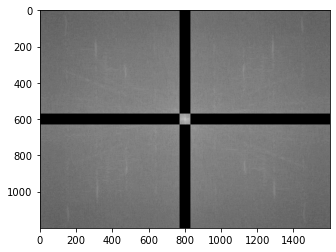

In [ ]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift[600 - 30 : 600 + 30, 0 : 800 - 30] = fshift[600 - 30 : 600 + 30, 800+30 : 1600] = 0
fshift[0 : 600 - 30, 800 - 30 : 800 + 30] = fshift[600 + 30 : 1200, 800 - 30 : 800 + 30] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

Let's return to the image familiar to the eye.

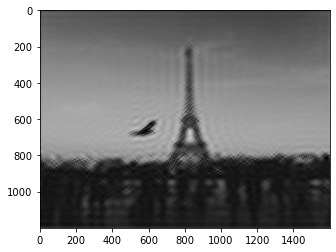

In [ ]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

Thus, we enhanced the sharpness of the obtained objects.

# **Image gradient and edge detection**



To detect edges in the image, it is useful to construct the so called image gradients. To use Laplace operator, just use the following code:

6934950 0 0 0


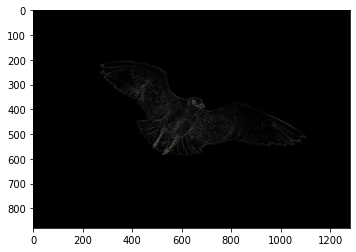

In [ ]:
img = cv2.imread('seagull.jpg')
####img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(img, -1)
plt.imshow(laplacian,cmap = 'gray')
l=0
for i in range(1280):
  for j in range(879):
    B,G,R=laplacian[j][i]
    l=l+B+G+R
B,G,R=laplacian[500][1279]
print(l,R,G,B)

You can see how clearly the boundaries of all objects are displayed. The lecture also provides information on Sobel operators. Below you can see the results of applying these operators for the first and for the second coordinate separately, and for two at the same time.

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff7f16d3e20>,
 <matplotlib.image.AxesImage at 0x7ff7f1b58d30>)

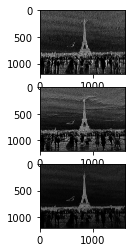

In [ ]:
sobel_x = cv2.Sobel(img, -1, 1, 0, ksize = 5)
sobel_y = cv2.Sobel(img, -1, 0, 1, ksize = 5)
sobel_full = cv2.Sobel(img, -1, 1, 1, ksize = 5)
plt.subplot(3,1,1),plt.imshow(sobel_x, cmap = 'gray')
plt.subplot(3,1,2),plt.imshow(sobel_y, cmap = 'gray')
plt.subplot(3,1,3),plt.imshow(sobel_full, cmap = 'gray')

Canny edge detector successfully finds edges in the image. You can apply it the following way:

3128085 0


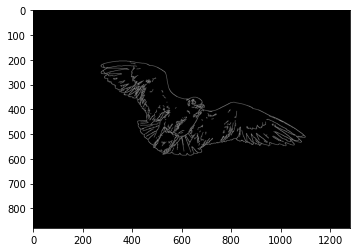

In [ ]:
ib=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny, cmap = 'gray')
l=0
for i in range(1280):
  for j in range(879):
    B=canny[j][i]
    l=l+B
h=canny[500][1279]
print(l,h)